# Assignment 1

In this assignment, you will be analyzing Uber pickup data. You have been given several features defined and labeled by Uber using historical data and you will create a model that will predict whether or not a rider is happy about the pickup experience or not. Uber would like to know whether the features they have determined allow for a good ML model performance. 

This data set contains the following features:

* **id**: trip id assigned by Uber
* **driver_id**: id number of the driver assigned by Uber
* **uber_type**: type of the uber ride requested (Uber Black, UberX, UberPool)
* **rider_type**: type of the rider determined/labeled in-house by Uber (Premium, Commuter, HFR - High Frequency Rider, Social, Traveler, Other)
* **rendezvous_confidence**: confidence score of the rendezvous location determined based on historical trips
* **driver_distance**: the distance of the driver (in feet) to the rendezvous location when "ride has arrived" signal is sent to the rider determined based on GPS location
* **rider_distance**: the distance of the rider (in feet) to the rendezvous location when "ride has arrived" signal is sent to the rider
* **ata_vs_eta**: the time difference (in minutes) between the actual time of arrival (ATA) and the estimated time of arrival (eta)
* **happiness**: 0 or 1 indicating whether the rider is happy about the pickup experience or not (derived from ratings)

**Note**: rider_distance has missing values. You are instructed not to drop any rows with missing values, instead you will need to impute them based on another feature.




## Library and Data Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
u_data = pd.read_csv('Uber_pickup.csv')

In [3]:
u_data.head()

,id,driver_id,uber_type,rider_type,rendezvous_confidence,rider_distance,driver_distance,ata_vs_eta,happiness
0,ID86355,NM0GE9E70F1043201,Uber Black,Traveler,5.304,29.67,3.7,0.9,1
1,ID86355,WBALZ5C56CD701241,Uber Black,Traveler,5.304,30.67,3.7,1.0,1
2,ID868202,1FTEW1E87AK806915,UberPool,HFR,3.622,22.47,10.8,1.1,1
3,ID927241,SALVN2BG6DH555886,UberPool,Traveler,4.712,29.33,5.0,1.1,1
4,ID927241,YV4902BZ0E1579049,UberPool,Traveler,4.712,29.33,5.0,1.1,1


In [4]:
u_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1138 entries, 0 to 1137
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1138 non-null   object 
 1   driver_id              1138 non-null   object 
 2   uber_type              1138 non-null   object 
 3   rider_type             1138 non-null   object 
 4   rendezvous_confidence  1138 non-null   float64
 5   rider_distance         1032 non-null   float64
 6   driver_distance        1138 non-null   float64
 7   ata_vs_eta             1138 non-null   float64
 8   happiness              1138 non-null   int64  
dtypes: float64(4), int64(1), object(4)
memory usage: 80.1+ KB


In [5]:
u_data.describe()

,rendezvous_confidence,rider_distance,driver_distance,ata_vs_eta,happiness
count,1138.000000,1032.000000,1138.000000,1138.000000,1138.000000
mean,3.854411,25.039738,9.801933,6.401933,0.405975
std,0.562318,13.035700,2.430518,3.525344,0.491296
min,2.105200,5.710000,0.100000,0.900000,0.000000
25%,3.454800,13.452500,8.600000,2.400000,0.000000
50%,3.834800,20.880000,10.400000,6.100000,0.000000
75%,4.212000,37.752500,11.500000,9.600000,1.000000
max,6.536000,53.810000,14.600000,14.800000,1.000000


## Exploratory Data Analysis through Visualizations


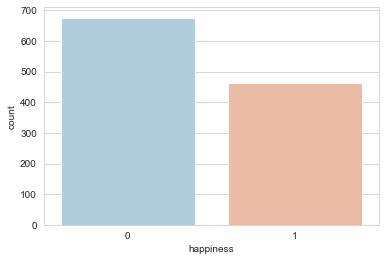

In [6]:
sns.set_style("whitegrid")
sns.countplot(x='happiness',data=u_data,palette='RdBu_r')

Text(0.5, 0, 'rider_distance')

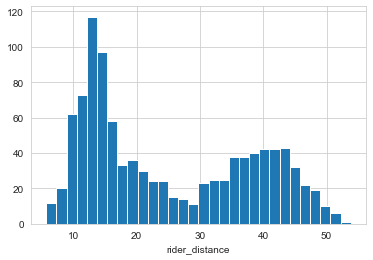

In [7]:
sns.set_style('whitegrid')
u_data['rider_distance'].hist(bins=30)
plt.xlabel('rider_distance')

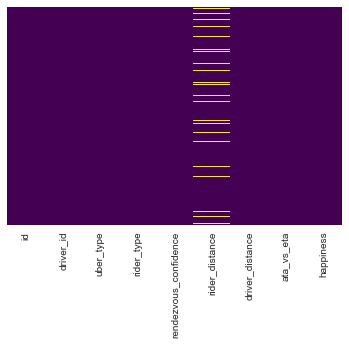

In [8]:
sns.heatmap(u_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

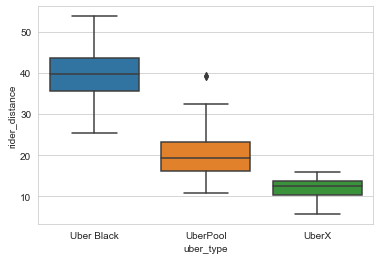

In [9]:
sns.boxplot(x='uber_type', y='rider_distance', data=u_data)

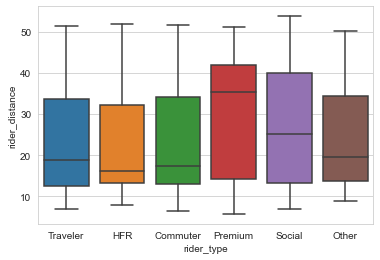

In [10]:
sns.boxplot(x='rider_type', y='rider_distance', data=u_data)

In [11]:
u_data.groupby('uber_type')['rider_distance'].mean()

uber_type
Uber Black    39.868184
UberPool      20.025971
UberX         12.064716
Name: rider_distance, dtype: float64

In [12]:
u_data.groupby('rider_type')['rider_distance'].mean()

rider_type
Commuter    22.528593
HFR         22.197933
Other       23.864681
Premium     30.213270
Social      27.334621
Traveler    23.251022
Name: rider_distance, dtype: float64

## Data Cleaning

In [13]:
def impute_distance(cols):
    rider_distance = cols[0]
    uber_type = cols[1]
    
    if pd.isnull(rider_distance):
        if uber_type == 'Uber Black':
            return 39
        elif uber_type == 'UberPool':
            return 20
        else:
            return 12
    else:
        return rider_distance

In [14]:
u_data['rider_distance']=u_data[['rider_distance','uber_type']].apply(impute_distance,axis=1)

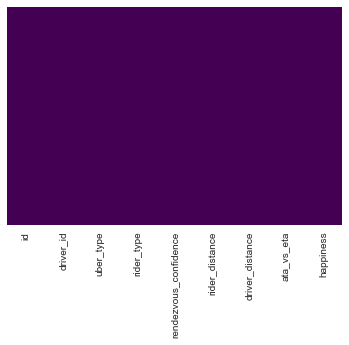

In [15]:
sns.heatmap(u_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [16]:
uberType = pd.get_dummies(u_data['uber_type'], drop_first=True)

In [17]:
uberType1 = pd.get_dummies(u_data['rider_type'])

In [18]:
u_data = pd.concat([u_data, uberType, uberType1], axis=1)
u_data.head()

,id,driver_id,uber_type,rider_type,rendezvous_confidence,rider_distance,driver_distance,ata_vs_eta,happiness,UberPool,UberX,Commuter,HFR,Other,Premium,Social,Traveler
0,ID86355,NM0GE9E70F1043201,Uber Black,Traveler,5.304,29.67,3.7,0.9,1,0,0,0,0,0,0,0,1
1,ID86355,WBALZ5C56CD701241,Uber Black,Traveler,5.304,30.67,3.7,1.0,1,0,0,0,0,0,0,0,1
2,ID868202,1FTEW1E87AK806915,UberPool,HFR,3.622,22.47,10.8,1.1,1,1,0,0,1,0,0,0,0
3,ID927241,SALVN2BG6DH555886,UberPool,Traveler,4.712,29.33,5.0,1.1,1,1,0,0,0,0,0,0,1
4,ID927241,YV4902BZ0E1579049,UberPool,Traveler,4.712,29.33,5.0,1.1,1,1,0,0,0,0,0,0,1


In [19]:
u_data.drop(['id', 'driver_id', 'uber_type', 'rider_type'], axis=1, inplace=True)

In [20]:
u_data.head()

,rendezvous_confidence,rider_distance,driver_distance,ata_vs_eta,happiness,UberPool,UberX,Commuter,HFR,Other,Premium,Social,Traveler
0,5.304,29.67,3.7,0.9,1,0,0,0,0,0,0,0,1
1,5.304,30.67,3.7,1.0,1,0,0,0,0,0,0,0,1
2,3.622,22.47,10.8,1.1,1,1,0,0,1,0,0,0,0
3,4.712,29.33,5.0,1.1,1,1,0,0,0,0,0,0,1
4,4.712,29.33,5.0,1.1,1,1,0,0,0,0,0,0,1


## Building the Model

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
u_data.columns

Index(['rendezvous_confidence', 'rider_distance', 'driver_distance',
       'ata_vs_eta', 'happiness', 'UberPool', 'UberX', 'Commuter', 'HFR',
       'Other', 'Premium', 'Social', 'Traveler'],
      dtype='object')

In [23]:
X = u_data.drop('happiness',axis=1)
y = u_data['happiness']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=110)

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
logmodel = LogisticRegression(max_iter=500)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=500)

## Predictions and Evaluations

In [27]:
predictions = logmodel.predict(X_test)

In [28]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [29]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       194
           1       0.96      0.79      0.87       148

    accuracy                           0.89       342
   macro avg       0.91      0.88      0.89       342
weighted avg       0.90      0.89      0.89       342



In [30]:
print(confusion_matrix(y_test, predictions))

[[189   5]
 [ 31 117]]


The confusion matrix is interpreted as below:

               Predicted Unhappy	Predicted Happy    Total
True Unhappy          189	               5	        194
True Happy	           31	             117	        148
Total	              220	             122	        342

Accuracy : (TP+TN)/Total = (117+189)/342 = 0.895

Error : (FN+FP)/Total = (31+5)/342 = 0.105 

Recall : TP/(TP+FN) = 117/(117+31) = 0.790

Precision : TP/(TP+FP) = 117/(117+5) = 0.959

Since the FP are less, this model has high precision. So this model can be suitable to predict the customer's happiness. However, there can be additional features added to enhance the model performance. Such as:
Rating - The rating provided by rider after the ride, 1 to 5 stars. High stars would mean higher happiness.
Tips given - Whether the rider has offered any tip to the driver. If tips are given, that would mean the rider is happy.
Rider Feedback - Has the rider provided any feedback, and if it is positive or negative.